# Projet

### Imports

In [156]:
# Imports
import glob, os
import pandas
import urllib
from SPARQLWrapper import SPARQLWrapper
import PIL.Image
from skimage import io
import ipywidgets
import matplotlib.pyplot as plt
import numpy
from sklearn.cluster import KMeans
from random import randint

## 1. Collecte de données

### Dataframe Functions

In [199]:
def getData():   
    path = "data.json"
    with open(path, "r", encoding="utf-8") as f:
        dataframe = pandas.read_json(f, orient='index')
    return dataframe

def saveData(dataframe):   
    path = "data.json"
    with open(path, "w", encoding="utf-8") as f:
        f.write(dataframe.to_json(orient='index', indent=2))

def getUsers():   
    path = "users.json"
    with open(path, "r", encoding="utf-8") as f:
        dataframe = pandas.read_json(f, orient='index')
    return dataframe

def saveUsers(dataframe):   
    path = "users.json"
    with open(path, "w", encoding="utf-8") as f:
        f.write(dataframe.to_json(orient='index', indent=2))

### Récupération du résultat d'une query Wikidata

In [ ]:
size = 20
imagesPath = "./images/"

# Query de Wikidata
sparql = SPARQLWrapper("https://query.wikidata.org/sparql")
query = """
SELECT ?item ?itemLabel ?pic WHERE {
  ?item wdt:P31 wd:Q4989906;
    wdt:P18 ?pic.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
LIMIT """
# On précise le nombre d'entrées que l'on veut
query = query + str(size)

# On récupère le résultat de la query
sparql.setQuery(query)
sparql.setReturnFormat("json")
results = sparql.query().convert()

# On normalise les résultat pour pandas
array = []
for trainData in results["results"]["bindings"]:
    name = trainData["itemLabel"]["value"]
    format = trainData["pic"]["value"].split(".")[-1]
    path = f"{imagesPath}{name}.{format}"

    array.append([name,  
                  trainData["pic"]["value"], 
                  trainData["item"]["value"].split(sep='/')[-1],
                  format,
                  path,
                  (),
                  None,
                  ['#monument']])
                  

dataframe = pandas.DataFrame(array, columns=["label", "link", "entityID", "format", "path", "size", "sizeCategory", "tags"])

# On enregistre les données au format JSON
saveData(dataframe)

# Nettoyage du dossier /images
if not os.path.isdir('./images'):
  os.mkdir('./images')

# Nettoyage du dossier /images
else:
  files = glob.glob('./images/*')
  for f in files:
      os.remove(f)



dataframe


### Téléchargement des Images

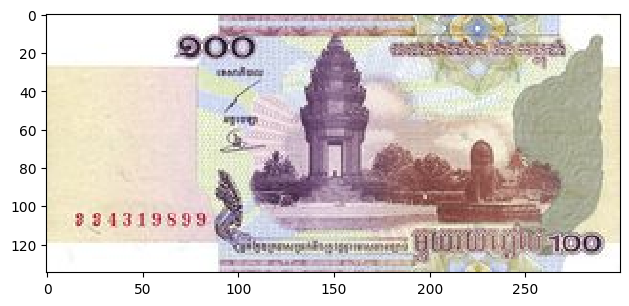

In [146]:
dataframe = getData(dataPath)
for i in range(len(dataframe.index)):
    # On télécharge l'image
    link = dataframe._get_value(i,"link")
    path = dataframe._get_value(i,"path")
    response = urllib.request.urlretrieve(link, path)


 
img = io.imread(path)
io.imshow(img)

### Récupération des Données EXIFS

In [147]:
dataframe = getData(dataPath)

wantedExifs = [274, 315, 306, 272]
columnNames = ["orientation", "artist", "dateTaken", 'appareil']

for i,tag in enumerate(wantedExifs):
    dataframe[columnNames[i]] = None
    

# On parcours les entrées
for i in range(len(dataframe.index)):
    path = dataframe._get_value(i,"path")
    img = PIL.Image.open(path)
    exif_data = img._getexif()
    img.close()

    dataframe.at[i, "size"] = img.size
    if img.size[0] < img.size[1]:
        dataframe.at[i, "orientation"] = 0
    else:
        dataframe.at[i, "orientation"] = 1

    if exif_data:
      for tag in exif_data:
            if tag in wantedExifs:
                dataframe.at[i, columnNames[wantedExifs.index(tag)]] = exif_data[tag]
                
dataframe.astype({'orientation': 'int32'})

# On enregistre les données au format JSON
saveData(dataframe)
        
dataframe 

,label,link,entityID,format,path,size,sizeCategory,tags,orientation,artist,dateTaken,appareil
0,Castillo La Iruela,http://commons.wikimedia.org/wiki/Special:File...,Q1049272,jpg,./images/Castillo La Iruela.jpg,"(4000, 3000)",NaN,[#monument],1,ANGEL CAMINERO,2015:05:18 13:54:21,Canon PowerShot G9
1,Castillo La Iruela,http://commons.wikimedia.org/wiki/Special:File...,Q1049272,jpg,./images/Castillo La Iruela.jpg,"(4000, 3000)",NaN,[#monument],1,ANGEL CAMINERO,2015:05:18 13:54:21,Canon PowerShot G9
2,Castillo de la Luz,http://commons.wikimedia.org/wiki/Special:File...,Q1049274,jpg,./images/Castillo de la Luz.jpg,"(7219, 3753)",NaN,[#monument],1,None,2017:01:17 15:46:25,NIKON D810
3,Castillo de Valencia de Don Juan,http://commons.wikimedia.org/wiki/Special:File...,Q1049275,jpg,./images/Castillo de Valencia de Don Juan.jpg,"(2070, 2448)",NaN,[#monument],1,None,2011:06:25 19:59:46,FinePix F480
4,China Millennium Monument,http://commons.wikimedia.org/wiki/Special:File...,Q1056441,jpg,./images/China Millennium Monument.jpg,"(4000, 2664)",NaN,[#monument],1,None,2017:06:02 16:28:37,Canon PowerShot SX50 HS
5,China Millennium Monument,http://commons.wikimedia.org/wiki/Special:File...,Q1056441,jpg,./images/China Millennium Monument.jpg,"(4000, 2664)",NaN,[#monument],1,None,2017:06:02 16:28:37,Canon PowerShot SX50 HS
6,Palacio de la Condesa de Lebrija,http://commons.wikimedia.org/wiki/Special:File...,Q1064212,JPG,./images/Palacio de la Condesa de Lebrija.JPG,"(1728, 2304)",NaN,[#monument],0,None,2007:03:11 13:29:53,DSC-P73
7,Monument aux Girondins,http://commons.wikimedia.org/wiki/Special:File...,Q1064990,JPG,./images/Monument aux Girondins.JPG,"(1536, 2048)",NaN,[#monument],0,None,2009:07:21 19:16:36,E3200
8,Chartered Company Monument,http://commons.wikimedia.org/wiki/Special:File...,Q1067824,jpg,./images/Chartered Company Monument.jpg,"(1200, 1800)",NaN,[#monument],0,CEphoto; Uwe Aranas,2012:09:09 21:52:32,DSLR-A700
9,Cho Huan Lai Memorial,http://commons.wikimedia.org/wiki/Special:File...,Q1075516,jpg,./images/Cho Huan Lai Memorial.jpg,"(1200, 1800)",NaN,[#monument],0,CEphoto; Uwe Aranas,2012:09:30 12:28:15,DSLR-A700


### Kmeans et Couleurs dominantes

In [148]:
dataframe = getData(dataPath)
dataframe["dColors"] = None
dataframe["dProportions"] = None

nColors = 6
laziness = 100

kmeans = KMeans(n_clusters=nColors, random_state=0, n_init="auto")


for i, path in enumerate(dataframe["path"]):
    img = PIL.Image.open(path).convert('RGB')
    pixelData = numpy.array(img).reshape(-1, 3)[::laziness]
    kmeans.fit(pixelData)

    proportions = numpy.array([0 for i in range(nColors)])
    for x in kmeans.labels_:
        proportions[x] += numpy.float64(1)
    proportions = proportions / kmeans.labels_.size

    dataframe.at[i,"dColors"] = numpy.int32(kmeans.cluster_centers_)
    dataframe.at[i,"dProportions"] = proportions
    
saveData(dataframe)



,label,link,entityID,format,path,size,sizeCategory,tags,orientation,artist,dateTaken,appareil,dColors,dProportions
0,Castillo La Iruela,http://commons.wikimedia.org/wiki/Special:File...,Q1049272,jpg,./images/Castillo La Iruela.jpg,"[4000, 3000]",NaN,[#monument],1,ANGEL CAMINERO,2015:05:18 13:54:21,Canon PowerShot G9,"[[130, 118, 100], [92, 86, 61], [83, 149, 228]...","[0.166225, 0.19656666666666667, 0.342091666666..."
1,Castillo La Iruela,http://commons.wikimedia.org/wiki/Special:File...,Q1049272,jpg,./images/Castillo La Iruela.jpg,"[4000, 3000]",NaN,[#monument],1,ANGEL CAMINERO,2015:05:18 13:54:21,Canon PowerShot G9,"[[130, 118, 100], [92, 86, 61], [83, 149, 228]...","[0.166225, 0.19656666666666667, 0.342091666666..."
2,Castillo de la Luz,http://commons.wikimedia.org/wiki/Special:File...,Q1049274,jpg,./images/Castillo de la Luz.jpg,"[7219, 3753]",NaN,[#monument],1,None,2017:01:17 15:46:25,NIKON D810,"[[126, 120, 122], [208, 223, 238], [166, 184, ...","[0.13349942789650462, 0.40801313992544197, 0.0..."
3,Castillo de Valencia de Don Juan,http://commons.wikimedia.org/wiki/Special:File...,Q1049275,jpg,./images/Castillo de Valencia de Don Juan.jpg,"[2070, 2448]",NaN,[#monument],1,None,2011:06:25 19:59:46,FinePix F480,"[[137, 125, 96], [152, 194, 220], [193, 176, 1...","[0.11289813316493666, 0.12244938232624225, 0.0..."
4,China Millennium Monument,http://commons.wikimedia.org/wiki/Special:File...,Q1056441,jpg,./images/China Millennium Monument.jpg,"[4000, 2664]",NaN,[#monument],1,None,2017:06:02 16:28:37,Canon PowerShot SX50 HS,"[[20, 27, 17], [137, 164, 190], [103, 100, 95]...","[0.1477665165165165, 0.40910285285285286, 0.16..."
5,China Millennium Monument,http://commons.wikimedia.org/wiki/Special:File...,Q1056441,jpg,./images/China Millennium Monument.jpg,"[4000, 2664]",NaN,[#monument],1,None,2017:06:02 16:28:37,Canon PowerShot SX50 HS,"[[20, 27, 17], [137, 164, 190], [103, 100, 95]...","[0.1477665165165165, 0.40910285285285286, 0.16..."
6,Palacio de la Condesa de Lebrija,http://commons.wikimedia.org/wiki/Special:File...,Q1064212,JPG,./images/Palacio de la Condesa de Lebrija.JPG,"[1728, 2304]",NaN,[#monument],0,None,2007:03:11 13:29:53,DSC-P73,"[[39, 31, 27], [190, 171, 155], [254, 253, 252...","[0.23546993519867385, 0.09730245642236399, 0.0..."
7,Monument aux Girondins,http://commons.wikimedia.org/wiki/Special:File...,Q1064990,JPG,./images/Monument aux Girondins.JPG,"[1536, 2048]",NaN,[#monument],0,None,2009:07:21 19:16:36,E3200,"[[54, 64, 45], [183, 196, 207], [100, 105, 98]...","[0.06081124038400407, 0.33737046220357303, 0.0..."
8,Chartered Company Monument,http://commons.wikimedia.org/wiki/Special:File...,Q1067824,jpg,./images/Chartered Company Monument.jpg,"[1200, 1800]",NaN,[#monument],0,CEphoto; Uwe Aranas,2012:09:09 21:52:32,DSLR-A700,"[[25, 27, 17], [178, 176, 172], [94, 89, 82], ...","[0.20587962962962963, 0.36898148148148147, 0.1..."
9,Cho Huan Lai Memorial,http://commons.wikimedia.org/wiki/Special:File...,Q1075516,jpg,./images/Cho Huan Lai Memorial.jpg,"[1200, 1800]",NaN,[#monument],0,CEphoto; Uwe Aranas,2012:09:30 12:28:15,DSLR-A700,"[[82, 83, 40], [234, 218, 205], [32, 36, 13], ...","[0.16152777777777777, 0.22171296296296297, 0.2..."


## Analyse des Données

In [206]:
# Création de la dataframe des utilisateurs

array = [['default',[],[]]]
usersDataframe = pandas.DataFrame(array, columns=['name', 'likes','dislikes'])

saveUsers(usersDataframe)

usersDataframe

,name,likes,dislikes
0,default,[],[]


In [203]:
def addUser(name):
    usersDf = getUsers()
    usersDf.loc[len(usersDf.index)] = [name,[],[]] 
    saveUsers(usersDf)
    

In [239]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

def getRecommandation(user):

    likedImages = getUsers()["likes"][getUsers().index["name" == user].tolist()[0]]
    dislikedImages = getUsers()["dislikes"][getUsers().index["name" == user].tolist()[0]]

    trainDataIndexes = likedImages + dislikedImages
    result = []
    for i in trainDataIndexes:
        if i in likedImages:
            result.append("likes")
        else:
            result.append("dislikes")
    
    data = numpy.array(getData()[['tags','orientation']])
    trainData = [trainData[i] for i in trainDataIndexes]
    
    for i in range(trainData.shape[0]):
        for j in range(trainData.shape[1]):
            trainData[i][j] = str(trainData[i][j])


    # Encode categorical features and labels
    label_encoders = [LabelEncoder() for _ in range(len(trainData[0]))]
    encoded_data = []
    for i, column in enumerate(zip(*trainData)):
        encoded_data.append(label_encoders[i].fit_transform(column))

    X = list(zip(*encoded_data))  # Features
    y = result  # Labels


    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    classifier = svm.SVC()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    # prediction
    for item in data

    sample_item = numpy.array(getData()[['tags','orientation']])[-1]
    sample_item = [str(attribute) for attribute in sample_item]

    encoded_item = [label_encoders[i].transform([val])[0] for i, val in enumerate(sample_item)]
    prediction = classifier.predict([encoded_item])[0]
    print(f"Prediction for the sample item: {prediction}")


## Visualisation des Données

<BarContainer object of 9 artists>

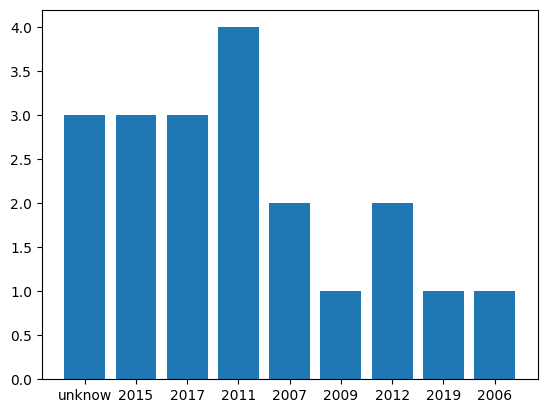

In [153]:
dataframe = getData(dataPath)

criteriaToColumn = {'year':'dateTaken', 'orientation':'orientation'}
criteria = ''
while criteria not in criteriaToColumn :
    criteria = input('criteria :')


categories = ['unknow']
cardinals  = [0]


for i in range(len(dataframe.index)):
    value = str(dataframe._get_value(i, criteriaToColumn[criteria]))

    if value != 'None':
        if criteria == 'year':
            value = value.split(':')[0].strip()
        elif criteria == 'orientation':
            value = {'0':"Portrait", '1':"Landscape"}[value]

        if value in categories:
            cardinals[categories.index(value)] += 1
        else:
            categories.append(value)
            cardinals.append(1)
    else:
        cardinals[0] += 1


plt.bar(categories, cardinals)

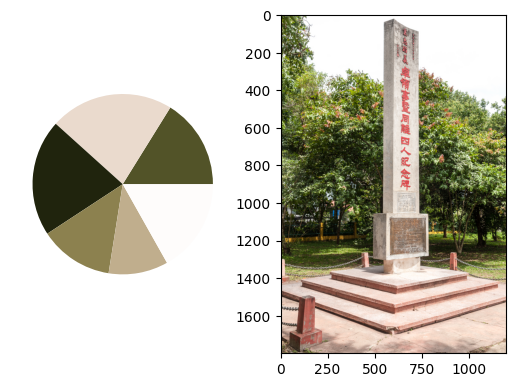

In [171]:
dataframe = getData(dataPath)

imageIndex = randint(0, len(dataframe['label']))

fig, ax = plt.subplots(1,2)

ax[0].pie(dataframe.at[imageIndex,"dProportions"], colors=(numpy.array(dataframe.at[imageIndex, "dColors"])/255))
ax[1].imshow(PIL.Image.open(dataframe.at[imageIndex, "path"]))


## Application

In [238]:
wTab = ipywidgets.widgets.Tab()
currentUser = 'default'


# UsersWidget
wCurrentUser = ipywidgets.widgets.Dropdown(
    options=getUsers()['name'],
    value='default',
    description='Current User :',
    disabled=False
)
def updateCurrentUser(tmp):
    global currentUser
    currentUser = wCurrentUser.value
wCurrentUser.observe(updateCurrentUser)

def updateUserWidget():
    wCurrentUser.options = getUsers()['name']

# Create User Tab
wUsername = ipywidgets.widgets.Text(
    value='',
    placeholder='',
    description='Username:',
    disabled=False   
)
wBtnCreateUser = ipywidgets.widgets.Button(
    description='Create',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Creates a new user',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

def createUser(tmp):
    newUser = wUsername.value
    addUser(newUser)
    updateUserWidget()


wBtnCreateUser.on_click(createUser)

wBoxCreateUser = ipywidgets.HBox([wUsername,wBtnCreateUser])

# Random Images Tab
dataframe = getData()
imagePaths = dataframe['path']

wBtnGetRnd = ipywidgets.widgets.Button(description="Get new random Images")
wBtnSelect = ipywidgets.widgets.Button(description="Validate Likes")



rowArray = [wBtnGetRnd]
wCheckArray = []
wImgLayout = ipywidgets.Layout(width = '60%')
cellLayout = ipywidgets.Layout(width = '50%', border = '3px')
def getRandomImages(tmp):
    cellArray = []

    global rowArray
    global wCheckArray

    rowArray = [wBtnGetRnd]
    wCheckArray = []

    for i,path in enumerate(imagePaths[:7]):
        with open(path, "rb") as f :
            wImg   = ipywidgets.widgets.Image(value=f.read(), layout = wImgLayout)
            wCheckArray.append(ipywidgets.Checkbox())
            cellArray.append(ipywidgets.HBox([wImg, wCheckArray[-1]], layout = cellLayout))
        if (i+1)%3 == 0:
            rowArray.append(ipywidgets.HBox(cellArray))
            cellArray = []
    rowArray.append(wBtnSelect)
    updateTab(rowArray)

wBtnGetRnd.on_click(getRandomImages)


def get_likes(btn):
    likedImagePaths    = [imagePaths[i] for i, wCheck in enumerate(wCheckArray) if wCheck.value]
    dislikedImagePaths = [path for path in imagePaths if(path not in likedImagePaths)]

    likedImages    = [dataframe.index[dataframe['path'] == path].tolist()[0] for path in likedImagePaths]
    dislikedImages = [dataframe.index[dataframe['path'] == path].tolist()[0] for path in dislikedImagePaths]
    
    
    usersDf = getUsers()
    currentUserIndex = usersDf.index[usersDf['name'] == currentUser].tolist()[0]
    usersDf['likes'][currentUserIndex] = likedImages
    usersDf['dislikes'][currentUserIndex] = dislikedImages
    saveUsers(usersDf)
    print(usersDf)


wBtnSelect.on_click(get_likes)


def updateTab(rowArray):
    wTab.children = [wBoxCreateUser, ipywidgets.VBox(rowArray)]
    wTab.titles   = ['User', 'Random Images']

    return ipywidgets.VBox([wCurrentUser, wTab])


updateTab(rowArray)



      name      likes                                           dislikes
0  default     [3, 4]  [0, 0, 2, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...
1   zefzef  [3, 4, 4]  [0, 0, 2, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...
2     John         []                                                 []
3     Fifi         []                                                 []
4     Riri         []                                                 []
